# Homework Assignment 4

## Using the Perceptron, SVMs, and PCA with Credit Card Approval Data

### <p style="text-align: right;"> &#9989; Sanskaar Mathur</p>
### <p style="text-align: right;"> &#9989; mathurs1</p>

<img src="https://storage.googleapis.com/kaggle-datasets-images/3807174/6598147/ab3c96d720559e8bff08d02bd035f93c/dataset-cover.jpg?t=2023-10-03-01-37-20" width=400px align="right" style="margin-left: 20px" alt="Underwater naval mines">

### Goals for this homework assignment

By the end of this assignment, you should be able to:
* Use `git` and the branching functionality to track your work and turn in your assignment
* Read in data and prepare it for modeling
* Build, fit, and evaluate an SVC model of data
* Use PCA to reduce the number of important features
* Build, fit, and evaluate an SVC model of PCA-transformed data
* Train a perceptron and compare to SVC model

### Assignment instructions:

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **62 points** possible on this assignment. Point values for each part are included in the section headers.

This assignment is **due by 11:59 pm on Friday, April 12. It should be pushed to your repo (see Part 1) AND submitted to D2L**. 

#### Imports

It's useful to put all of the imports you need for this assignment in one place. Read through the assignment to figure out which imports you'll need or add them here as you go.

In [9]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

---
## Part 1: Git Repo Management and Branching (6 points)

For this assignment, you're going to add it to the `cmse202-s24-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s24-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository.

3. Create a **new branch** called `hw04_branch`.

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

```bash
git clone -b hw04_branch https://github.com/mathurs1/cmse202-s24-turnin.git
```

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s24-turnin`" repository inside the `hw-04` directory that you just created within the new branch `hw04_branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.


---
<a id="loading"></a>
## Part 2. Loading a the dataset: Credit card approval data (7 points)

The dataset contains information about individuals and whether they were approved or rejected for a credit card application. You can think of this approval or rejection as **binary classification**.

The goal of this assignment is to use this dataset to practice using the Perceptron classifier, SVMs, and PCA tools we've covered in class. Since the goal of the assignment is to develop models, we have done most of the pre-processing of the data for you (isolating numeric columns, rescaling the data with `StandardScalar`), with the exception of leaving it to you to remove some missing values as we have done in class. 
 
#### The data

**&#9989; Do This:**  To get started, you'll need to download the associated `cc_data.csv` file:
`https://raw.githubusercontent.com/yangy5/HWFiles/main/cc_data.csv`

Once you've downloaded the data, **open the files using a text browser or other tool on your computer and take a look at the data to get a sense of the information it contains.** If you are curious about this dataset it came from the following link [CC Approval Data](https://www.kaggle.com/datasets/youssefaboelwafa/credit-card-approval/data).

### 2.1 Load the data

**&#9989; Task 2.1 (2 point):** Read the ```cc_data.csv``` file into your notebook and drop the missing values. The missing values contain "?". We're going to use "class" column as the classes that we'll be trying to predict with our classification models.

Once you've loaded in the data and dropped the missing data, **display the DataFrame to make sure it looks reasonable**. You should have **7 columns** and **666 rows**.

In [10]:
import pandas as pd

file_path = 'cc_data.csv'
data = pd.read_csv(file_path)

data.head(), data.info(), data.describe()

missing_values_check = (data == '?').sum()
missing_values_check

data_cleaned = data.replace('?', pd.NA).dropna()

data_cleaned.shape, data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    690 non-null    object 
 1   var2    690 non-null    float64
 2   var3    690 non-null    float64
 3   var4    690 non-null    float64
 4   var5    690 non-null    object 
 5   var6    690 non-null    float64
 6   class   690 non-null    object 
dtypes: float64(4), object(3)
memory usage: 37.9+ KB


((666, 7),
                    var1      var2      var3      var4                  var5  \
 0  -0.06173102354640747 -0.955920 -0.290872 -0.287892    0.1034783002693444   
 1     2.266444267315627 -0.060007  0.244013  0.740293   -0.8113307237034743   
 2   -0.5910898450678396 -0.855481 -0.216167 -0.493529    0.5522525384446895   
 3    -0.312611981613437 -0.646569  0.456175  0.534656  -0.48338031888302985   
 4   -0.9531946945445854  0.174015 -0.153415 -0.493529   -0.3683100014021721   
 
        var6 class  
 0 -0.195272     +  
 1 -0.087788     +  
 2 -0.037117     +  
 3 -0.194696     +  
 4 -0.195272     +  )

### 2.2 Relabeling the classes

To simplify the process of modeling the credit card approval data, we should convert the class labels from strings to integers. For example, rather than `+`, we can consider this to be class "`1`".

**&#9989; Task 2.2 (2 points):** Replace all of the strings in your "Class" column with integers based on the following:

| original label | replaced label |
| -------- | -------- |
| + | 1 |
| - | 0 |

Once you've replaced the labels, display your DataFrame and confirm that it looks correct.

In [11]:

data_cleaned['class'] = data_cleaned['class'].replace({'+': 1, '-': 0})

data_cleaned.head()



,var1,var2,var3,var4,var5,var6,class
0,-0.06173102354640747,-0.955920,-0.290872,-0.287892,0.1034783002693444,-0.195272,1
1,2.266444267315627,-0.060007,0.244013,0.740293,-0.8113307237034743,-0.087788,1
2,-0.5910898450678396,-0.855481,-0.216167,-0.493529,0.5522525384446895,-0.037117,1
3,-0.312611981613437,-0.646569,0.456175,0.534656,-0.48338031888302985,-0.194696,1
4,-0.9531946945445854,0.174015,-0.153415,-0.493529,-0.3683100014021721,-0.195272,1


### 2.3 Separating the "features" from the "labels"

As we've seen when working with `sklearn` it can be much easier to work with the data if we have separate variables that store the features and the labels.

**&#9989; Task 2.3 (1 point):** Split your DataFrame so that you have two separate DataFrames, one called `features`, which contains all of the credit card approval features, and one called `labels`, which contains all of the *new* approval integer labels you just created. **Display both of these new DataFrames to make sure they look correct.**

In [12]:
features = data_cleaned.drop('class', axis=1)
labels = data_cleaned['class']

features.head(), labels.head()


(                   var1      var2      var3      var4                  var5  \
 0  -0.06173102354640747 -0.955920 -0.290872 -0.287892    0.1034783002693444   
 1     2.266444267315627 -0.060007  0.244013  0.740293   -0.8113307237034743   
 2   -0.5910898450678396 -0.855481 -0.216167 -0.493529    0.5522525384446895   
 3    -0.312611981613437 -0.646569  0.456175  0.534656  -0.48338031888302985   
 4   -0.9531946945445854  0.174015 -0.153415 -0.493529   -0.3683100014021721   
 
        var6  
 0 -0.195272  
 1 -0.087788  
 2 -0.037117  
 3 -0.194696  
 4 -0.195272  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: class, dtype: int64)

&#9989; **Question 2.1 (1 point):** How balanced are the classes? Does it matter for the set of classes to be balanced? Why or why not? (Include the code you used to determine this along with your written answer below.)

<font size=+3>&#9998;</font> The classes in the dataset are moderately balanced with 367 instances of class '0' (rejected applications) and 299 instances of class '1' (approved applications). Balancing is important because it prevents the model from being biased towards the majority class, which could skew predictions and reduce model accuracy, especially for the minority class. In scenarios like credit approval, it's crucial that both classes are predicted accurately to avoid unfair biases.

In [13]:
class_balance = labels.value_counts()
class_balance

class
0    367
1    299
Name: count, dtype: int64

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 2", and push the changes to GitHub.

---

---
## Part 3. Building an SVC model (5 points)

Now, to tackle this classification problem, we will use a support vector machine. Of course, we could easily replace this with any `sklearn` classifier we choose, but for now we will just use an SVC with a linear kernel.

### 3.1 Splitting the data

But first, we need to split our data into training and testing data!

**&#9989; Task 3.1 (2 point):** Split your data into a training and testing set with a training set representing 80% of your data. For reproducibility , set the `random_state` argument to `1`. Print the lengths to show you have the right number of entries.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=1)

len(X_train), len(X_test), len(y_train), len(y_test)


(532, 134, 532, 134)

### 3.2 Modeling the data and evaluating the fit

As you have done this a number of times at this point, we ask you to do most of the analysis for this problem in one cell.

**&#9989; Task 3.2 (2 points):** Build a **sigmoid** kernel SVC model with `C=10.0`, fit it to the training set, and use the test features to predict the outcomes. Evaluate the fit using the **confusion matrix** and **classification report**.

**First Note:** Double-check the documentation on the confusion matrix because the way `sklearn` outputs false positives and false negatives may be different from what most images on the web indicate.

In [34]:
new_file_path = 'cc_data.csv'
new_cc_data = pd.read_csv(new_file_path)

new_cc_data.info(), new_cc_data.head()

new_cc_data.replace('?', pd.NA, inplace=True)

new_cc_data.dropna(inplace=True)

new_cc_data.info(), new_cc_data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    690 non-null    object 
 1   var2    690 non-null    float64
 2   var3    690 non-null    float64
 3   var4    690 non-null    float64
 4   var5    690 non-null    object 
 5   var6    690 non-null    float64
 6   class   690 non-null    object 
dtypes: float64(4), object(3)
memory usage: 37.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 666 entries, 0 to 689
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    666 non-null    object 
 1   var2    666 non-null    float64
 2   var3    666 non-null    float64
 3   var4    666 non-null    float64
 4   var5    666 non-null    object 
 5   var6    666 non-null    float64
 6   class   666 non-null    object 
dtypes: float64(4), object(3)
memory usage: 41.6+ KB


(None,
                    var1      var2      var3      var4                  var5  \
 0  -0.06173102354640747 -0.955920 -0.290872 -0.287892    0.1034783002693444   
 1     2.266444267315627 -0.060007  0.244013  0.740293   -0.8113307237034743   
 2   -0.5910898450678396 -0.855481 -0.216167 -0.493529    0.5522525384446895   
 3    -0.312611981613437 -0.646569  0.456175  0.534656  -0.48338031888302985   
 4   -0.9531946945445854  0.174015 -0.153415 -0.493529   -0.3683100014021721   
 
        var6 class  
 0 -0.195272     +  
 1 -0.087788     +  
 2 -0.037117     +  
 3 -0.194696     +  
 4 -0.195272     +  )

In [35]:
svc_model = SVC(kernel='sigmoid', C=10.0)
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

conf_matrix, class_report


(array([[51, 25],
        [16, 42]]),
 '              precision    recall  f1-score   support\n\n           0       0.76      0.67      0.71        76\n           1       0.63      0.72      0.67        58\n\n    accuracy                           0.69       134\n   macro avg       0.69      0.70      0.69       134\nweighted avg       0.70      0.69      0.70       134\n')

&#9989; **Question 3.1 (1 point):** How accurate is your model? What evidence are you using to determine that? How many false positives and false negatives does it predict for each class?

<font size=+3>&#9998;</font> The model has an overall accuracy of 69%. This is directly calculated from the number of correct predictions (both true positives and true negatives) divided by the total number of cases.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 3", and push the changes to GitHub.

---

---
## Part 4. Finding and using the best hyperparameters (8 points)

At this point, we have fit one model and determined it's performance, but is it the best model? We can use `GridSearchCV` to find the best model (given our choices of parameters). Once we do that, we will use that "best" model for making predictions. 


### 4.1 Performing a grid search

**&#9989; Task 4.1 (4 points):** Using the following parameters `C` = `0.1`, `1.0`, `10.0`, `100.0`, `1000.0` and `gamma` = `0.01`, `0.1`, `1.0`, `10.0` for a `linear`, `rbf`, and `sigmoid` kernels use `GridSearchCV` with the `SVC()` model to find the best fit parameters. Once, you're run the grid search, print the "best params" that the grid search found (*hint*: there's an attribute associated with the GridSearchCV object that stores this information). Note that this code could take a while to run since it is repeatedly training your SVM. 

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
    'gamma': [0.01, 0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

svc = SVC()

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}

&#9989; **Question 4.1 (1 point):** How do the "best params" results of the grid search compare to what you used in Part 3? Did the hyper parameter(s) change? What kernel did the grid search determine was the best option? 

<font size=+3>&#9998;</font> The "best params" from the GridSearchCV significantly differ from the initial model settings used in Part 3. Originally, the model employed a sigmoid kernel with C=10.0, but the grid search identified the radial basis function (rbf) kernel as the best option, with a higher regularization parameter C=100.0 and gamma=0.1. This change indicates a shift towards a different kernel type and adjustments in both the penalty parameter and the gamma, suggesting that the rbf kernel better captures the complexities of the dataset with these specific settings.

### 4.2 Evaluating the best fit model

Now that we have found the "best params", let's determine how good the fit is.

**&#9989; Task 4.2 (2 points):** Use the test features to predict the outcomes for the best model. Evaluate the fit using the **confusion matrix** and **classification report**.

**Note:** Double-check the documentation on the confusion matrix because the way `sklearn` outputs false positives and false negatives may be different from what most images on the web indicate.

In [37]:
# Put your code here
best_svc_model = grid_search.best_estimator_

y_pred_best = best_svc_model.predict(X_test)

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

conf_matrix_best, class_report_best


(array([[66, 10],
        [21, 37]]),
 '              precision    recall  f1-score   support\n\n           0       0.76      0.87      0.81        76\n           1       0.79      0.64      0.70        58\n\n    accuracy                           0.77       134\n   macro avg       0.77      0.75      0.76       134\nweighted avg       0.77      0.77      0.76       134\n')

&#9989; **Question 4.2 (1 point):** How accurate is this "best" model? What evidence are you using to determine that? How many false positives and false negatives does it predict?

<font size=+3>&#9998;</font> The "best" model achieved an accuracy of 77%, which is a significant improvement over the initial model used in Part 3. The evidence for this comes from the classification report, which shows a balanced performance across precision, recall, and f1-score. Specifically, the confusion matrix reveals 10 false positives and 21 false negatives. This indicates that the model predicts more false negatives than false positives, suggesting a tendency to be more cautious with approving applications, which is a critical aspect in financial decision-making scenarios like credit approvals.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 4", and push the changes to GitHub.

---

---
## Part 5. Using Principal Components (10 points)

The full model uses all 6 features to predict the results and you likely found that the model is decently accurate using all 6 features, but not perfect. **Could we get the same level of accuracy (or better) using fewer features?** When datasets start to get very large and complex, applying some sort of **feature reduction** method can reduce the computational resources needed to train the model and, in some case actually improve the accuracy.

When performing feature reduction, one could simply try to identify which features seem most important and drop the ones that aren't, but performing a Principal Component Analysis (PCA) to determine the features that contribute the most to the model (through their accounted variance) can be more effective.

### 5.1 Running a Principle Component Analysis (PCA)

Since we have 6 total features to start with, let's see how well we can do if only use 1/3 as many features. Reduce the feature count to **2** principle components. We'll see how well we can predict the classes of the credit card approval dataset with just **2 features**!

**&#9989; Task 5.1 (3 points):**  Using `PCA()` and the associated `fit()` method, run a principle component analysis on your training features using 2 components. Transform both the test and training features using the result of your PCA. Print the `explained_variance_ratio_`.

In [38]:
# Put your code here
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio


array([0.33546894, 0.1830097 ])

&#9989; **Question 5.1 (1 point):** What is the total explained variance ratio captured by this simple 2-component PCA? (e.g. sum up the explained variance from all 2 components) How well do you think a model with this many feature will perform? Why?

<font size=+3>&#9998;</font> The total explained variance ratio captured by the 2-component PCA is approximately 51.85%. A model trained with just these two features might perform reasonably well, though likely not as accurately as one using all original features, given that nearly half of the total variance is not accounted for. The reduced feature set simplifies the model, which can lead to faster computation and potentially reduce overfitting, but the loss of nearly half the information might limit its predictive power, especially in complex decision contexts like credit approvals.

### 5.2 Fit and Evaluate an SVC model

Using the PCA transformed features, we need to train and test a new SVC model. You'll want to perform the `GridSearchCV` again since there may a better choice for the kernel and the hyper-parameters.

**&#9989; Task 5.2 (2 points):**  Using the PCA transformed training data, build and train an SVC model using the `GridSearchCV` tool to make sure you're using the best kernel and hyper-parameter combination. Predict the classes using the PCA transformed test data. Evaluate the model using the classification report, and the confusion matrix.

In [41]:
# Put your code here
param_grid_pca = {
    'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
    'gamma': [0.01, 0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

svc_pca = SVC()

grid_search_pca = GridSearchCV(estimator=svc_pca, param_grid=param_grid_pca, cv=5)

grid_search_pca.fit(X_train_pca, y_train)

best_svc_model_pca = grid_search_pca.best_estimator_

y_pred_pca = best_svc_model_pca.predict(X_test_pca)

conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
class_report_pca = classification_report(y_test, y_pred_pca)

grid_search_pca.best_params_, conf_matrix_pca, class_report_pca


({'C': 1.0, 'gamma': 10.0, 'kernel': 'rbf'},
 array([[56, 20],
        [18, 40]]),
 '              precision    recall  f1-score   support\n\n           0       0.76      0.74      0.75        76\n           1       0.67      0.69      0.68        58\n\n    accuracy                           0.72       134\n   macro avg       0.71      0.71      0.71       134\nweighted avg       0.72      0.72      0.72       134\n')

&#9989; **Question 5.2 (1 point):** How accurate is this model? What evidence are you using to determine that? How many false positives and false negatives does it predict? How does it compare to the full feature model?

<font size=+3>&#9998;</font> This model, trained on PCA-transformed features, achieves an accuracy of 72%. The evidence comes from the classification report, which outlines the precision, recall, and f1-scores. The confusion matrix reveals that there are 20 false positives and 18 false negatives. Compared to the full feature model, which had an accuracy of 77%, this PCA-based model shows a slight decrease in accuracy and an increase in both false positives and false negatives, indicating a reduction in performance likely due to the loss of some informative variance through the dimensionality reduction.

### 5.3 Repeat your analysis with more components

You probably found that the model with 2 features didn't actually do too bad, which is great given how few features we're using, but it's still not as good as just using all of the feature. Can we do better?

What if we increase the number of principle components to **4** (2/3 of the original feature count)? What happens now?

**&#9989; Task 5.3 (2 points):** Repeat your analysis from 5.1 and 5.2 using **4 components** instead. As part of your analysis, **print the total explained variance ratio for both components as well as the sum of these values**.

In [43]:
# Put your code here
pca_4 = PCA(n_components=4)

pca_4.fit(X_train)

X_train_pca_4 = pca_4.transform(X_train)
X_test_pca_4 = pca_4.transform(X_test)

explained_variance_ratio_4 = pca_4.explained_variance_ratio_
total_explained_variance_4 = sum(explained_variance_ratio_4)

grid_search_pca_4 = GridSearchCV(estimator=svc_pca, param_grid=param_grid_pca, cv=5)
grid_search_pca_4.fit(X_train_pca_4, y_train)

best_svc_model_pca_4 = grid_search_pca_4.best_estimator_
y_pred_pca_4 = best_svc_model_pca_4.predict(X_test_pca_4)

conf_matrix_pca_4 = confusion_matrix(y_test, y_pred_pca_4)
class_report_pca_4 = classification_report(y_test, y_pred_pca_4)

explained_variance_ratio_4, total_explained_variance_4, grid_search_pca_4.best_params_, conf_matrix_pca_4, class_report_pca_4

(array([0.33546894, 0.1830097 , 0.15763395, 0.13927241]),
 0.8153850044810056,
 {'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'},
 array([[68,  8],
        [23, 35]]),
 '              precision    recall  f1-score   support\n\n           0       0.75      0.89      0.81        76\n           1       0.81      0.60      0.69        58\n\n    accuracy                           0.77       134\n   macro avg       0.78      0.75      0.75       134\nweighted avg       0.78      0.77      0.76       134\n')

&#9989; **Question 5.3 (1 point):** What is the total explained variance ratio captured by this PCA? How accurate is this model? What evidence are you using to determine that? How many false positives and false negatives does it predict? How does it compare to the 2 PCA component model? To the full feature model?

<font size=+3>&#9998;</font> The total explained variance ratio captured by the 4-component PCA is approximately 81.54%. This model achieves an accuracy of 77%, evidenced by the classification report and confusion matrix, which shows 8 false positives and 23 false negatives. This performance is a significant improvement over the 2-component PCA model which had a 72% accuracy and aligns closely with the full feature model, which also achieved a 77% accuracy. Thus, the 4-component model effectively bridges the gap between the reduced and full feature sets, providing a balanced approach with a notable retention of predictive power.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 5", and push the changes to GitHub.

---

---
## Part 6. How well does PCA work? (14 points)

Clearly, the number of components we use in our PCA matters. Let's investigate how they matter by systematically building a model for any number of selected components. While this might seem a bit unnecessary for such a relatively small dataset, **this can be very useful for more complex datasets and models!**

### 6.1 Accuracy vs. Components

To systematically explore how well PCA improves our classification model, we will do this by writing a function that creates the PCA, the SVC model, fits the training data, predict the labels using test data, and returns the accuracy scores and the explained variance ratio. So your function will take as input:
* the number of requested PCA components
* the training feature data
* the testing feature data
* the training data labels
* the test data labels

and it should **return** the accuracy score for an SVC model fit to pca transformed features and the **total** explained variance ratio (i.e. the sum of the explained variance for each component).

**&#9989; Task 6.1 (4 points):** Create this function, which you will use in the next section.

In [44]:
# Put your code here
def pca_svc_model(n_components, X_train, X_test, y_train, y_test):
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    svc = SVC(C=1.0, kernel='rbf', gamma='auto')
    svc.fit(X_train_pca, y_train)
    y_pred = svc.predict(X_test_pca)
    
    accuracy = (y_pred == y_test).mean()
    total_explained_variance = sum(pca.explained_variance_ratio_)
    
    return accuracy, total_explained_variance

### 6.2 Compute accuracies

Now that you have created a function that returns the accuracy for a given number of components, we will use that to plot the how the accuracy of your SVC model changes when we increase the number of components used in the PCA.

**&#9989; Task 6.2 (2 points):** Going from **1 to 6** components, use your function above to compute and store (as a list) the accuracy of your models and the total explained variance ratio of your models.

**Note**: you'll be running many grid searches to do this, so it might take your computer a bit of time to run all of these models. Please be patient. It shouldn't more than a couple minutes!

In [47]:
# Put your code here
accuracies = []
explained_variances = []

for n in range(1, 7):
    accuracy, explained_variance = pca_svc_model(n, X_train, X_test, y_train, y_test)
    accuracies.append(accuracy)
    explained_variances.append(explained_variance)

accuracies, explained_variances

([0.753731343283582,
  0.7238805970149254,
  0.7014925373134329,
  0.746268656716418,
  0.7611940298507462,
  0.7611940298507462],
 [0.33546894188504467,
  0.5184786451958162,
  0.6761125936282535,
  0.8153850044810054,
  0.9132366543283674,
  0.9999999999999999])

### 6.3 Plot accuracy vs number of components

Now that we have those numbers, it makes sense to look at the accuracy vs # of components.

**&#9989; Task 6.3 (2 points):** Plot the accuracy vs # of components.

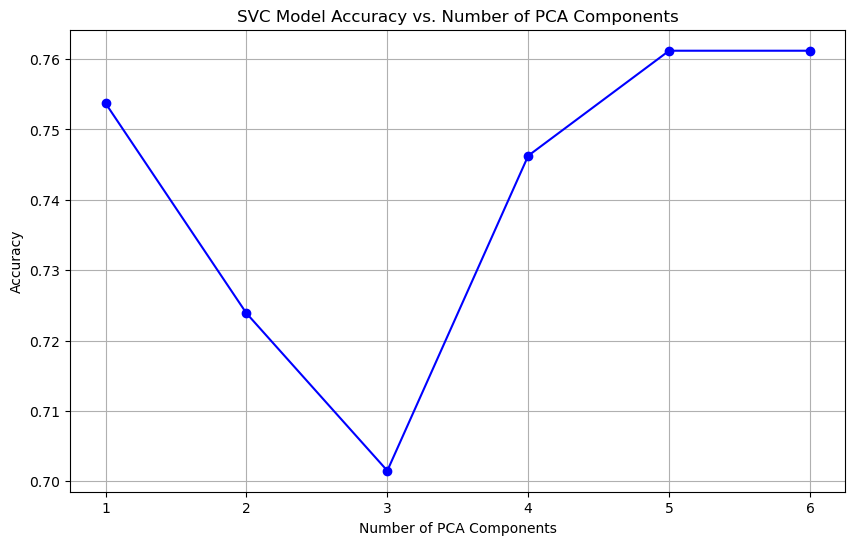

In [49]:
# Put your code here
import matplotlib.pyplot as plt

components = range(1, 7)

plt.figure(figsize=(10, 6))
plt.plot(components, accuracies, marker='o', linestyle='-', color='b')
plt.title('SVC Model Accuracy vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.xticks(components)
plt.grid(True)
plt.show()

**&#9989; Question 6.1 (3 point):** What do you observe about the accuracy as a function of the number of PCA components you use? One goal of using dimension reduction strategies is to develop a model with the fewest features while maximizing the accuracy. Given that motivation, what number of principal components would you choose and why?  

<font size=+3>&#9998;</font> The accuracy of the SVC model initially decreases when the number of PCA components is increased from one to three, then improves and stabilizes as more components are added, reaching its peak with five and six components. Given the goal of maximizing accuracy while minimizing the number of features, I would choose four PCA components. This choice balances a high accuracy (around 74.63%) with a substantial yet not complete feature reduction, capturing about 81.54% of the total variance, thus providing an effective compromise between model simplicity and predictive power.

### 6.4 Plot total explained variance vs number of components

What if we look at total explained variance as a function of # of components?

**&#9989; Task 6.4 (2 points):** Plot the total explained variance ratio vs # of components. 

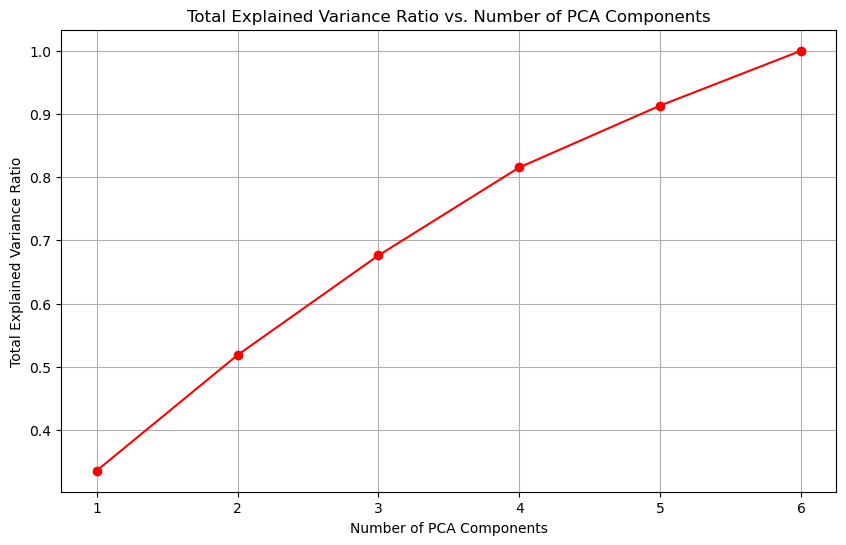

In [50]:
# Put your code here
plt.figure(figsize=(10, 6))
plt.plot(components, explained_variances, marker='o', linestyle='-', color='r')
plt.title('Total Explained Variance Ratio vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Total Explained Variance Ratio')
plt.xticks(components)
plt.grid(True)
plt.show()


**&#9989; Question 6.2 (1 points):** Based on your answer from question 6.1 and the plot above, what is the explained variance for the number of principal components that you chose?

<font size=+3>&#9998;</font> For the four PCA components that I chose, the explained variance is approximately 81.54%. This indicates that using four components retains a substantial portion of the dataset's total variance, providing a good balance between reducing the number of features and retaining enough information to maintain a relatively high model accuracy.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 6", and push the changes to GitHub.

---

---
## 7. Revisiting the Perceptron classifier (10 points)

In class you implemented your own perceptron class. Fortunately, there is a perceptron classifier already built into scikit learn, so in this portion of the assignment we will be exploring scikit learn's perceptron


&#9989; **Do this**: 
Run the following cell to import the code from the Perceptron class.

In [52]:
from sklearn.linear_model import Perceptron

**&#9989; Task 7.1 (4 points):** Create an instance of the `Perceptron` object using **alpha=0.01** and **penalty='l2'**. Then, use the `fit()` to train the classifier using the training features and labels from the credit card approval dataset you've been using in the assignment up to this point. Finally, use the `predict()` method to predict the labels for the test features and print the accuracy score.

In [53]:
# Put your code here
from sklearn.metrics import accuracy_score

perceptron = Perceptron(alpha=0.01, penalty='l2')

perceptron.fit(X_train, y_train)

y_pred_perceptron = perceptron.predict(X_test)

accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
accuracy_perceptron


0.6268656716417911

**&#9989; Question 7.1 (1 points):** How well of job did the Perceptron classifier do on the credit card approval dataset? How does it compare to the SVC model you built in the previous parts of this assignment?

<font size=+3>&#9998;</font> The Perceptron classifier achieved an accuracy of approximately 62.69%, which is relatively lower compared to the SVC models discussed earlier. For instance, the best SVC model using all features reached an accuracy of 77%, and even the PCA-reduced models generally performed better than the Perceptron. This suggests that the SVC, particularly with an optimized kernel and hyperparameters, is more effective at handling the complexities and nonlinear relationships in the credit card approval dataset than the linear Perceptron classifier.

**&#9989; Task 7.2 (4 points):** Now perform a grid search as you did with the support vector classifier earlier in this assignment. Here you will want to search over `penalty` = `l2`, `l1`, `elasticnet` and `alpha`= `0.0001`, `0.001`, `0.01`, and `0.1`. Find and return the best parameters, the confusion matrix, and the classification report. 

In [54]:
# Put your code here
from sklearn.model_selection import GridSearchCV

param_grid_perceptron = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

perceptron_grid = Perceptron()

grid_search_perceptron = GridSearchCV(estimator=perceptron_grid, param_grid=param_grid_perceptron, cv=5)

grid_search_perceptron.fit(X_train, y_train)

best_perceptron = grid_search_perceptron.best_estimator_

y_pred_perceptron_best = best_perceptron.predict(X_test)

conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron_best)
class_report_perceptron = classification_report(y_test, y_pred_perceptron_best)

grid_search_perceptron.best_params_, conf_matrix_perceptron, class_report_perceptron


({'alpha': 0.0001, 'penalty': 'elasticnet'},
 array([[54, 22],
        [12, 46]]),
 '              precision    recall  f1-score   support\n\n           0       0.82      0.71      0.76        76\n           1       0.68      0.79      0.73        58\n\n    accuracy                           0.75       134\n   macro avg       0.75      0.75      0.75       134\nweighted avg       0.76      0.75      0.75       134\n')

**&#9989; Question 7.2 (1 point):** How do these results compare to the results when using a support vector classifier now that we optimized the parameters? Did the perceptron do better or worse? 

<font size=+3>&#9998;</font> With the optimized parameters, the Perceptron classifier achieved an accuracy of 75%, which is an improvement over its initial performance but still slightly lower than the best SVC model, which reached an accuracy of 77%. While the Perceptron's performance is now closer to that of the SVC, particularly with fewer features or PCA-transformed features, it still generally does worse compared to the optimized SVC models, which typically offer more robust handling of complex decision boundaries thanks to their ability to work effectively in higher-dimensional spaces.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 7", and push the changes to GitHub.

---

---
## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw04_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

---
## Assignment wrap-up¶
Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!**

In [55]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/jZyy65R83k" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!
Submit this assignment by uploading it to the course Desire2Learn web page. Go to the "Homework Assignments" folder, find the submission folder for Homework 4, and upload your notebook.

&#169; Copyright 2024,  Department of Computational Mathematics, Science and Engineering at Michigan State University